In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def read_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [11]:
def edge_detection(img, line_width, blur_amount):
    gray_scale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    gray_scale_img_blur = cv2.medianBlur(gray_scale_img, blur_amount)

    img_edges = cv2.adaptiveThreshold(gray_scale_img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_width, blur_amount)

    return img_edges

In [12]:
def color_segmentation(img, k_value, epochs, accuracy):     
    data = np.float32(img)
    data = data.reshape((-1, 3))
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, epochs, accuracy)

    compactness, labels, centers = cv2.kmeans(data, k_value, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    result = centers[labels.flatten()]

    result = result.reshape(img.shape)

    return result

In [13]:
def generate(image, TOTAL_COLORS=4, LINE_WIDTH=7, BLUR_VALUE=5):
    
    EPOCHS = 50
    ACCURACY = 0.02

    img = read_img(image)

    edgeImg = edge_detection(img, LINE_WIDTH, BLUR_VALUE)
    segmented_img = color_segmentation(img, TOTAL_COLORS, EPOCHS, ACCURACY)
    
    blurred_img = cv2.bilateralFilter(segmented_img, d=7, sigmaColor=200, sigmaSpace=200)    
    cartoonized_img = cv2.bitwise_and(blurred_img, blurred_img, mask = edgeImg)    
    
    return cartoonized_img

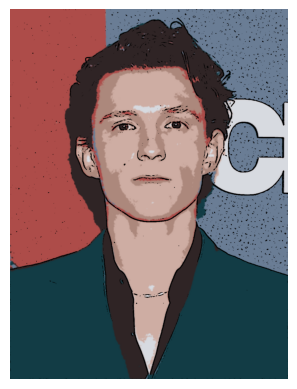

In [23]:
output_img = generate('images/1.jpg',TOTAL_COLORS=7)
plt.imshow(output_img)
plt.axis(False)
plt.show()